In [1]:
from ema_workbench import (
    Model,
    MultiprocessingEvaluator,
    SequentialEvaluator,
    ScalarOutcome,
    IntegerParameter,
    optimize,
    Scenario,
    Policy,
    save_results,
    load_results,
)
from ema_workbench.util import ema_logging

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from ema_workbench import MultiprocessingEvaluator, ema_logging
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



Declare model and problem formulation

In [2]:
ema_logging.log_to_stderr(ema_logging.INFO)
#model, steps = get_model_for_problem_formulation(5)
model, steps = get_model_for_problem_formulation(2)

Load candidate policies

In [3]:
test=pd.read_csv("robustness_final/Filtered Policies - to be tested for robustness.csv",index_col=0)
policies=test.to_dict('index')
policies=[Policy(f"policy {k}", **dict(v)) for k,v in policies.items()]

In [4]:
import random
random.seed(123)

In [5]:
n_scenarios=1000
with MultiprocessingEvaluator(model) as evaluator:
    experiments, results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 1000 scenarios * 3 policies * 1 model(s) = 3000 experiments
100%|██████████████████████████████████████| 3000/3000 [37:42<00:00,  1.33it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [6]:
from ema_workbench.analysis import feature_scoring

In [6]:
#Can use previously generated experiments or perform new experiments
#scenario_results=load_results("robustness_final/policy_robustness_1000_scenarios_final.tar.gz")

[MainProcess/INFO] results loaded successfully from C:\Users\gabby\OneDrive - Delft University of Technology\2023-2024 Q4\Model-Based Decision-making\git_final\MBDM_model_Delata_comission_2024\final assignment\robustness_final\policy_robustness_1000_scenarios_final.tar.gz


In [7]:
#experiments,results=scenario_results

In [7]:
cleaned_experiments = experiments.drop(columns=[l.name for l in model.levers])
scores = feature_scoring.get_feature_scores_all(cleaned_experiments,results)

C:\Users\gabby\miniconda3\envs\MBDM\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


C:\Users\gabby\miniconda3\envs\MBDM\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)
C:\Users\gabby\miniconda3\envs\MBDM\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)
C:\Users\gabby\miniconda3\envs\MBDM\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


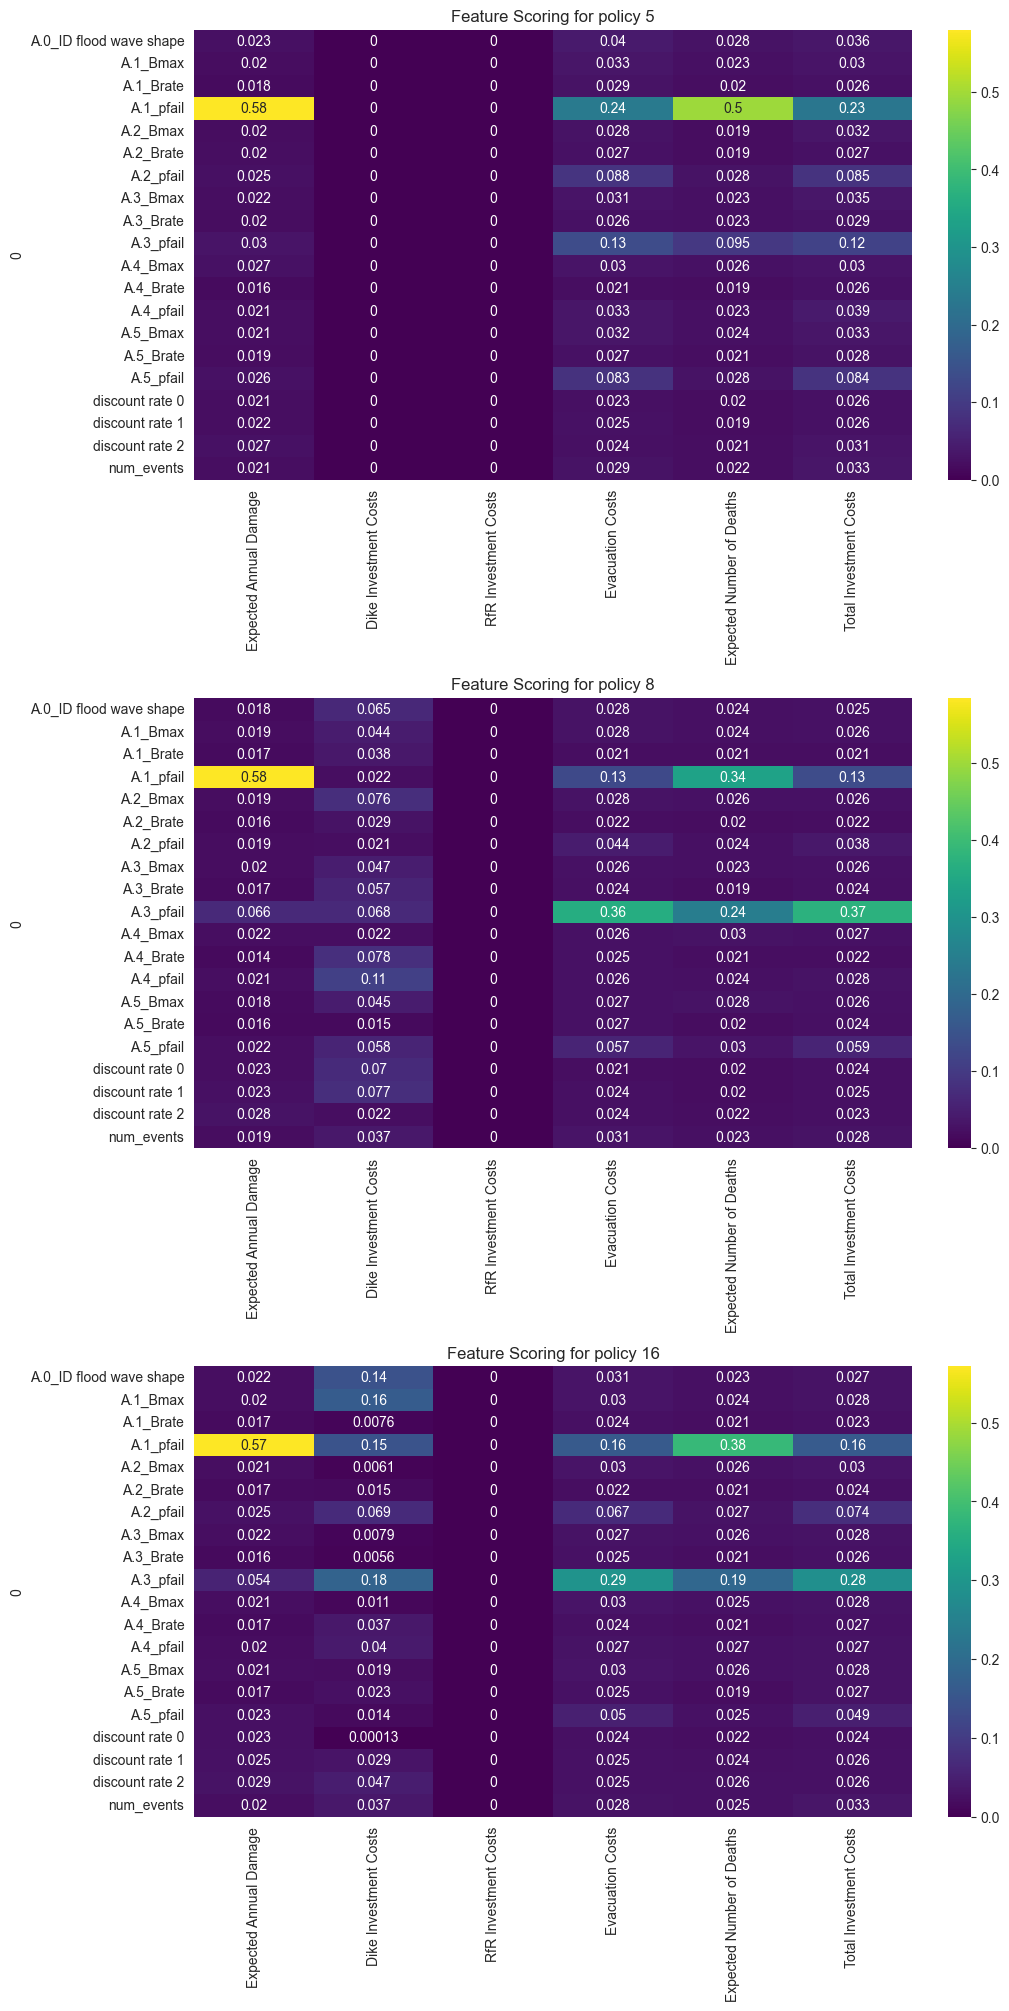

In [8]:
# code adapted from assignment 7 - model answer
cleaned_experiments = experiments.drop(columns=[l.name for l in model.levers])

figure,axes=plt.subplots(len(experiments.policy.unique()),1,constrained_layout=True,figsize=(10,20))
idx=0
for policy in experiments.policy.unique():
    logical = experiments.policy == policy
    subset_results = {k:v[logical] for k,v in results.items()}
    scores = feature_scoring.get_feature_scores_all(cleaned_experiments[logical],
                                                   subset_results)
    sns.heatmap(scores, annot=True, cmap='viridis',ax=axes[idx])
    axes[idx].set_title(f"Feature Scoring for {policy}")
    idx+=1

plt.savefig("robustness_final/GSA_final/Feature Scoring Heatmaps for problem formulation 2 testing policy alternatives_new_run.png",bbox_inches='tight')
plt.show()

C:\Users\gabby\miniconda3\envs\MBDM\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


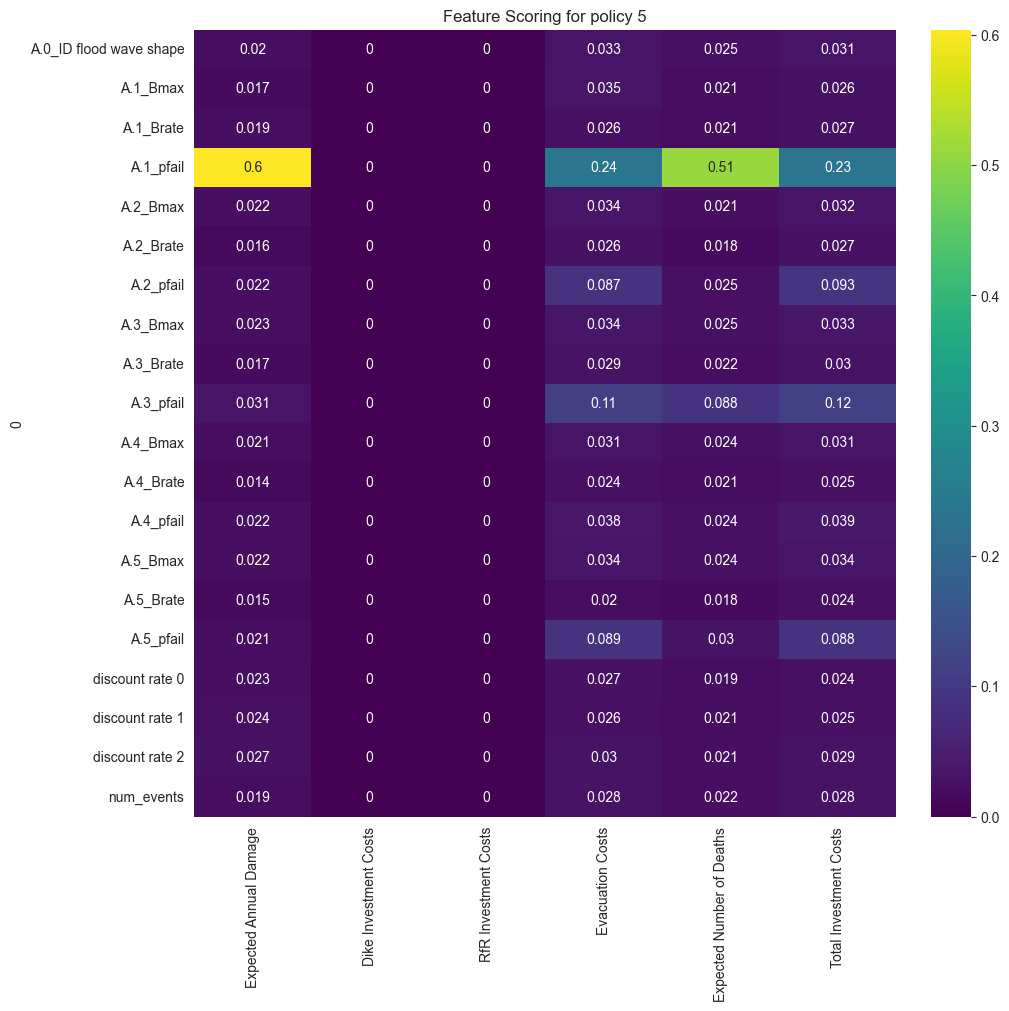

C:\Users\gabby\miniconda3\envs\MBDM\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


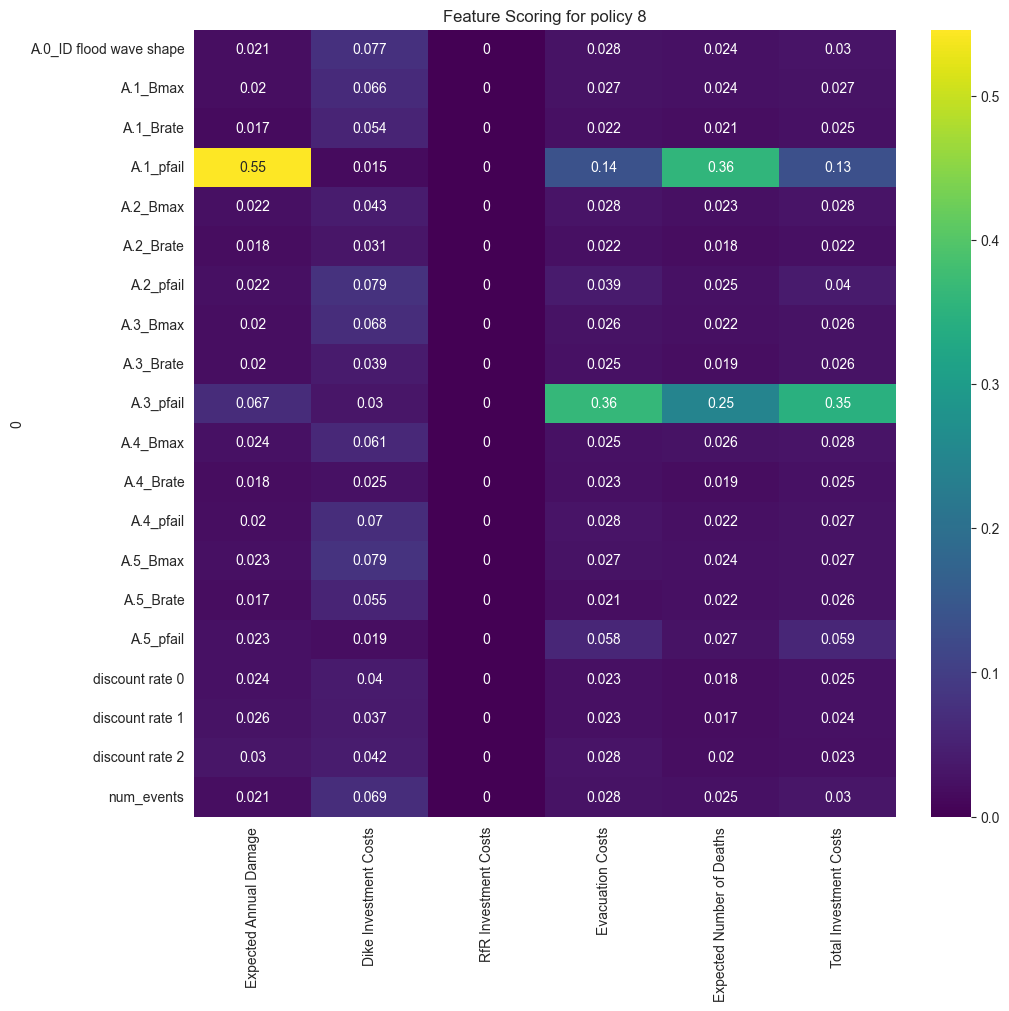

C:\Users\gabby\miniconda3\envs\MBDM\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


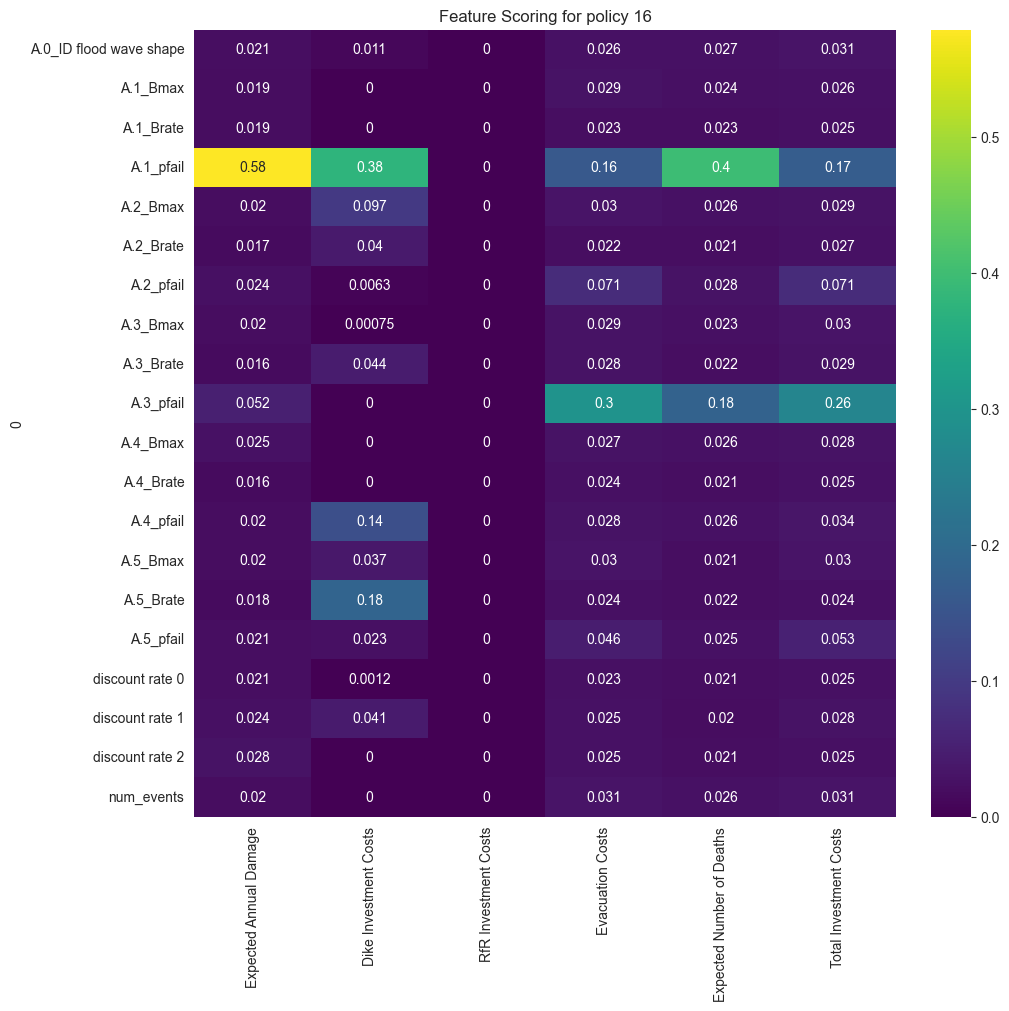

In [9]:
#import seaborn as sns
cleaned_experiments = experiments.drop(columns=[l.name for l in model.levers])

#figure,axes=plt.subplots(len(experiments.policy.unique()),1,constrained_layout=True,figsize=(10,20))
#idx=0
for policy in experiments.policy.unique():
    fig,ax=plt.subplots(1,1,figsize=(10,10),constrained_layout=True)
    logical = experiments.policy == policy
    subset_results = {k:v[logical] for k,v in results.items()}
    scores = feature_scoring.get_feature_scores_all(cleaned_experiments[logical],
                                                   subset_results)
    sns.heatmap(scores, annot=True, cmap='viridis',ax=ax)
    ax.set_title(f"Feature Scoring for {policy}")
    #idx+=1
    fig.savefig(f"robustness_final/GSA_final/Feature Scoring PF 2 {policy}.png",bbox_inches='tight')
    plt.show()


